In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt



2023-12-26 21:10:21.084682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 21:10:21.084713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 21:10:21.085778: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 21:10:21.092330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 21:10:21.908049: W tensorflow/compiler/tf2

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                         height_shift_range=0.1,shear_range=0.1,
                                         zoom_range=0.2,rescale=1./255,
                                         horizontal_flip=True)

In [4]:
train_generator = train_datagen.flow_from_directory('./cifar10/train',
                                                   target_size=(32,32),
                                                   batch_size=(20),
                                                   class_mode='categorical')

Found 50000 images belonging to 10 classes.


In [5]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
test_generator = test_datagen.flow_from_directory('./cifar10/test/',
                                                 target_size=(32,32),
                                                 batch_size=(10),
                                                 class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [7]:
def plot_loss():
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss per Epochs')
    plt.show()

In [8]:
def plot_acc():
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Accuracy')
    plt.ylabel('Epochs')
    plt.title('Accuracy per Epochs')
    plt.show()

### Model 1

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=.2,
                                                                height_shift_range=.1,
                                                                width_shift_range=.1,
                                         zoom_range=0.2,rescale=1./255,
                                         horizontal_flip=True)

In [12]:
train_generator = train_datagen.flow_from_directory('./cifar10/train',
                                                   target_size=(32,32),
                                                   batch_size=(20),
                                                   class_mode='categorical')

Found 50000 images belonging to 10 classes.


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', 
              metrics='accuracy')

2023-12-26 21:12:29.882194: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-26 21:12:29.901438: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-26 21:12:29.901631: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [14]:
model.build()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                        

In [16]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50


2023-12-26 21:12:58.398836: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-26 21:12:58.490837: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-26 21:12:58.779252: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-26 21:12:59.381528: I external/local_xla/xla/service/service.cc:168] XLA service 0x7faf6d16da20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-26 21:12:59.381550: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-26 21:12:59.387428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703635979.455631    6754 device_compiler.

2500/2500 [==============================] - 44s 16ms/step - loss: 1.4863 - accuracy: 0.4627 - val_loss: 1.2649 - val_accuracy: 0.5526
Epoch 2/50
2500/2500 [==============================] - 36s 14ms/step - loss: 1.2358 - accuracy: 0.5642 - val_loss: 1.0613 - val_accuracy: 0.6202
Epoch 3/50
2500/2500 [==============================] - 36s 15ms/step - loss: 1.1306 - accuracy: 0.6010 - val_loss: 0.9824 - val_accuracy: 0.6532
Epoch 4/50
2500/2500 [==============================] - 35s 14ms/step - loss: 1.0534 - accuracy: 0.6289 - val_loss: 0.9380 - val_accuracy: 0.6728
Epoch 5/50
2500/2500 [==============================] - 36s 14ms/step - loss: 0.9947 - accuracy: 0.6503 - val_loss: 0.8579 - val_accuracy: 0.6962
Epoch 6/50
2500/2500 [==============================] - 36s 14ms/step - loss: 0.9553 - accuracy: 0.6627 - val_loss: 0.8954 - val_accuracy: 0.6828
Epoch 7/50
2500/2500 [==============================] - 40s 16ms/step - loss: 0.9062 - accuracy: 0.6831 - val_loss: 0.8518 - val_accura

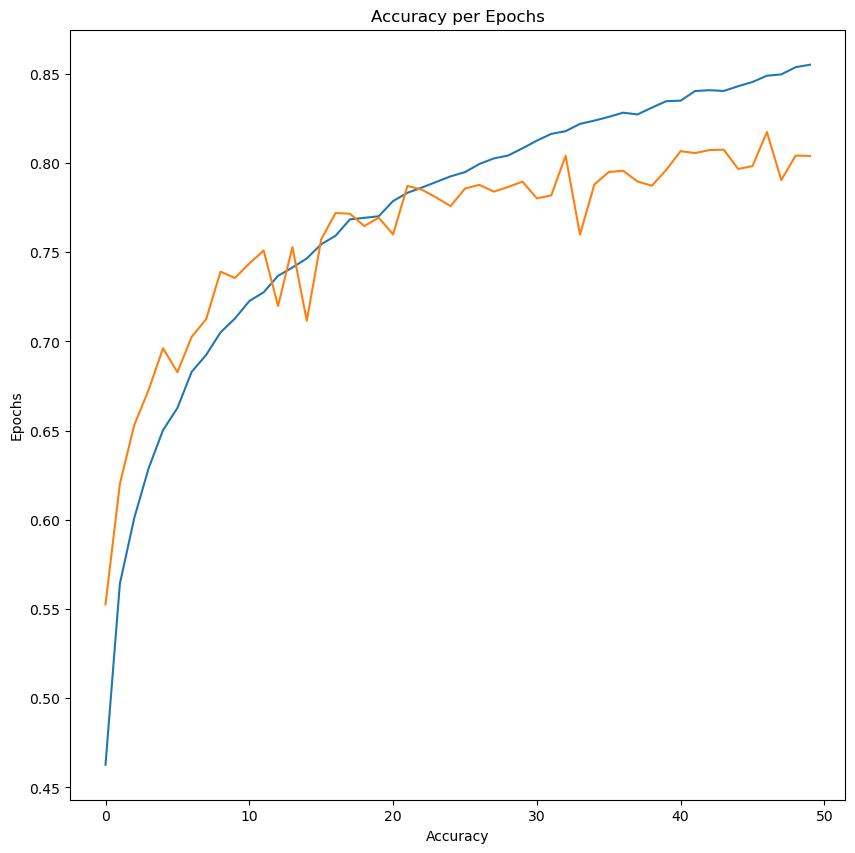

In [17]:
plot_acc()

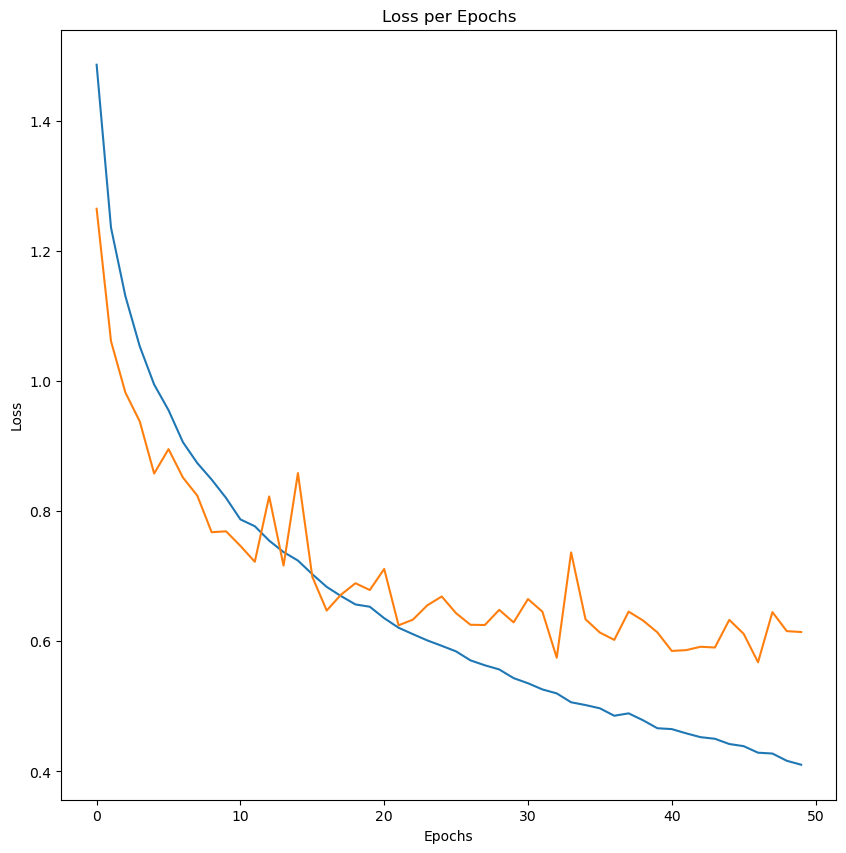

In [18]:
plot_loss()